In [23]:
import ipyaladin.aladin_widget as ipyal
import pandas as pd
from astroquery.simbad import Simbad
import astropy.units as u
from astropy import coordinates, units as u, wcs
from astropy.io.votable import parse
from astropy.table import Table, Column, QTable
from astropy.io import fits
from astropy.visualization import simple_norm
import numpy as np
from ipyaladin import Aladin
from ipywidgets import Layout, Box, widgets


from ipywidgets import interact, interactive, fixed, interact_manual

from astroquery.gaia import Gaia
from astroquery.vizier import Vizier

from astropy.wcs import WCS
from astropy.wcs.utils import skycoord_to_pixel
from astropy.nddata import CCDData
from astropy.coordinates import SkyCoord

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

import importlib 

%matplotlib notebook


coords= <SkyCoord (ICRS): (ra, dec) in deg
    (92.04725, 24.33526111)>


<IPython.core.display.Javascript object>


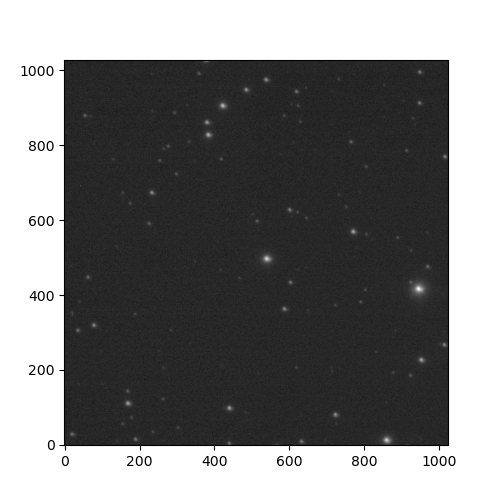

In [61]:
# Get coordinates of the field from our (partially reduced) test image from SAMI
# This is just to get coordinates and show what this field of view looks like with SOAR

raw_ori = "SAMI_raw_92.0421916666667_24.335395.fits"


hdu = fits.open(raw_ori) 
header = hdu[0].header
data = hdu[0].data




coords = SkyCoord(header["RA"],header["DEC"],unit=(u.hourangle,u.degree), frame='icrs')
print("coords=",coords)


fig0 = plt.figure(figsize=(5,5))
gs0 = GridSpec(figure=fig0,ncols=1,nrows=1)
axim1 = fig0.add_subplot(gs0[0])


im1 = axim1.imshow(data,origin='lower',cmap='gray')



In [62]:
# General field of view we are looking for can be shown by aladin


### NOTICE HOW THE IMAGES ARE FLIPPED IN X/RA ###

fov = 4*u.arcmin
aladin = ipyal.Aladin(target=coords.to_string(), fov=fov.to(u.degree).to_value(), survey='DSS')

aladin

Aladin(fov=0.06666666666666667, options=['allow_full_zoomout', 'coo_frame', 'fov', 'full_screen', 'log', 'over…

# Gaia query

We have a field of stars on which we wish to center slits made by the DMD.

We need Gaia astrometry for this, so select sets of stars to observe based on a Gaia query.
Link to info about returned tables: https://gea.esac.esa.int/archive/documentation/GDR2/Gaia_archive/chap_datamodel/sec_dm_main_tables/ssec_dm_gaia_source.html

Passbands:\
Full G-band (330–1050 nm) 	\
GBP-band (330–680 nm) - bluer \
GRP-band (630–1050 nm) - redder 

Blue-Red color column is 'bp_rp', larger number means redder (faint in blue, bright in red)


In [63]:
#easy gaia query

import setup_obs_functions as sof
importlib.reload(sof)

table1 = sof.submit_gaia_query(coords)
table1[20:]

INFO: Query finished. [astroquery.utils.tap.core]


index,dist,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,astrometric_sigma5d_max,frame_rotator_object_type,matched_observations,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url
int64,float64,float64,str28,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64,float32,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float32,float32,float64,float64,float64,float32,float32,float32,float64,float32,float32,float32,float64,float64,float64,float32,float32,float32,str13,float64,float64,float64,float64,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,float32,float32,float32,float32,float32,float32,str83
24,0.014223236678649774,1.6357214584097997e+18,Gaia DR2 3426275766286807936,3.426275766286808e+18,718635461.0,2015.5,92.06185052601505,0.2165192683678719,24.34030626636787,0.19950690154786804,-0.04105739044015545,0.21042584363429123,-0.19511572,-0.14455706839506766,0.41894796248564437,-4.362494027943342,0.3500829803666592,-0.40180323,0.0104437545,-0.4287724,0.5077336,-0.2020179,0.4253927,-0.5339325,0.29435536,0.08119966,-0.38575098,158.0,0.0,158.0,0.0,2.1385057,192.76149,0.29424307230275515,0.3882789098964327,31.0,0.0,0.47620505,1.4120207166275067,0.04632325394150001,-0.11031906,18.0,10.0,0.44340882,0.0,18.0,0.0,156.0,723.4093432951455,1.9895115183247893,363.61154,18.539906,14.0,318.5642528379797,9.324195075033405,34.165337,19.093395,17.0,632.1533446945438,10.968941402511422,57.631207,17.759865,1.314218,0.0,1.3335304,0.5534897,0.78004074,--,--,0.0,--,--,--,NOT_AVAILABLE,186.51283803565073,2.0645462991144274,91.87876447052258,0.9144712755961,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,https://gea.esac.esa.int/data-server/datalink/links?ID=Gaia+DR2+3426275766286807936
25,0.014314363658599168,1.6357214584097997e+18,Gaia DR2 3426275770585129984,3.42627577058513e+18,472443078.0,2015.5,92.06285601595965,0.035603781128594136,24.336959580154975,0.030610087047007305,0.30993693849636605,0.03457442041832778,8.964342,0.3291277041121679,0.0701144049729405,-2.7052359600258225,0.0580078339031278,-0.028965138,0.27298817,-0.32313332,0.1548721,-0.10974512,0.16055089,-0.43928376,0.06126997,-0.0018199886,0.112277165,131.0,0.0,131.0,0.0,-1.885841,97.80737,0.0,0.0,31.0,0.0,28.461664,1.63

# Pick some criteria for what kind of stars we want so we aren't overwhelmed with choices

In [64]:
pandacat = table1.to_pandas().drop(columns='index')
criteria=(pandacat['phot_bp_mean_mag'] > 10) & (pandacat['phot_rp_mean_mag'] < 15)

pandacat2 = pandacat[criteria].where(np.isnan(pandacat.parallax)==False).dropna(how='all').reset_index(drop=False)
table2 = QTable.from_pandas(pandacat2, index=True)


table2

_index_,index,dist,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,astrometric_sigma5d_max,frame_rotator_object_type,matched_observations,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url
int64,int64,float64,float64,str28,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64,float32,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float32,float32,float64,float64,float64,float32,float32,float32,float64,float32,float32,float32,float64,float64,float64,float32,float32,float32,str13,float64,float64,float64,float64,object,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,float32,float32,float32,float32,float32,float32,str83
0,21,0.014314363658599168,1.6357214584097997e+18,Gaia DR2 3426275770585129984,3.42627577058513e+18,472443078.0,2015.5,92.06285601595965,0.035603781128594136,24.336959580154975,0.030610087047007305,0.30993693849636605,0.03457442041832778,8.964342,0.3291277041121679,0.0701144049729405,-2.7052359600258225,0.0580078339031278,-0.028965138,0.27298817,-0.32313332,0.1548721,-0.10974512,0.16055089,-0.43928376,0.06126997,-0.0018199886,0.112277165,131.0,0.0,131.0,0.0,-1.885841,97.80737,0.0,0.0,31.0,0.0,28.461664,1.6382017744711526,0.008019583926501579,0.07430873,15.0,10.0,0.07442588,0.0,18.0,0.0,132.0,23624.63313353714,12.819839888192227,1842.8181,14.754953,17.0,13628.361830146607,33.42629422121763,407.7138,15.015279,16.0,14918.415194635716,47.00060936445314,317.40897,14.327613,1.2083479,0.0,0.68766594,0.26032543,0.4273405,--,--,0.0,--,--,--,NOT_AVAILABLE,186.51621175511778,2.0637263104885797,91.87972854029164,0.9111380483619023,100001,6833.0,6293.0,7237.875,--,--,--,--,--,--,200111,2.2021198,1.9626445,2.596261,9.524064,7.028694,12.019434,https://gea.esac.esa.int/data-server/datalink/links?ID=Gaia+DR2+3426275770585129984
1,27,0.015749086188994142,1.6357214584097997e+18,Gaia DR2 3426275839304609920,3.42627583930461e+18,420093482.0,2015.5,92.04153967097909,0.07828842417952009,24.350118057098495,0.07066721531978472,1.2907504686483753,0.08716618030349463,14.807927,-0.4867847062269637,0.1461825508203524,-9.876438813628344,0.12322833000334021,-0.18741871,0.20892875,-0.10175418,0.40850988,-0.2720535,0.28807953,-0.31628007,0.2847679,0.2733864,-0.16314748,165.0,0.0,165.0,0.0,27


# Now show the selected Gaia stars in the aladin viewer.

We might want to change the center of our field of view to maximize efficiency.



In [65]:
import ipyaladin.aladin_widget as ipyal
importlib.reload(ipyal)

aladin = ipyal.Aladin(target=coords.to_string(), fov=0.06,survey='dss')


aladin

Aladin(fov=0.06, options=['allow_full_zoomout', 'coo_frame', 'fov', 'full_screen', 'log', 'overlay_survey', 'o…

In [66]:
#then overplot stars in our selected group

#need to create new gaia table or else it won't show for some reason
aladin_table = QTable(table2[['_index_','ra','ra_error','dec', 'dec_error', 'parallax', 'parallax_error']])

aladin.add_table(aladin_table)

# Switch up center coordinates and redo Gaia query

In the above image, the selected stars leave a huge empty gap in the middle of the field of view.  

Let's resubmit the query, but first move the cursor to be centered in an area closer to the selected stars.

In [118]:
# I just moved the cursor in aladin to a different spot and wrote down those coordinates
new_coords = "06:08:8.455 +24:20:55.14"
new_center_coords = SkyCoord(new_coords, unit=(u.hourangle,u.degree), frame='icrs')

gaia_table_update = sof.submit_gaia_query(new_center_coords)

pandacat_update = gaia_table_update.to_pandas().drop(columns='index')

#should be an easier way to save and reapply criteria
same_criteria=(pandacat_update['phot_bp_mean_mag'] > 10) & (pandacat_update['phot_rp_mean_mag'] < 15)

pandacat_update2 = pandacat_update[same_criteria].where(np.isnan(pandacat_update.parallax)==False).dropna(how='all').reset_index(drop=True)


finaltable = QTable.from_pandas(pandacat_update2, index=True)


finaltable

INFO: Query finished. [astroquery.utils.tap.core]


index,dist,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,astrometric_sigma5d_max,frame_rotator_object_type,matched_observations,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url
int64,float64,float64,str28,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64,float32,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float32,float32,float64,float64,float64,float32,float32,float32,float64,float32,float32,float32,float64,float64,float64,float32,float32,float32,str13,float64,float64,float64,float64,object,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,float32,float32,float32,float32,float32,float32,str83
0,0.005928496705287895,1.6357214584097997e+18,Gaia DR2 3426275839304609920,3.42627583930461e+18,420093482.0,2015.5,92.04153967097909,0.07828842417952009,24.350118057098495,0.07066721531978472,1.2907504686483753,0.08716618030349463,14.807927,-0.4867847062269637,0.1461825508203524,-9.876438813628344,0.12322833000334021,-0.18741871,0.20892875,-0.10175418,0.40850988,-0.2720535,0.28807953,-0.31628007,0.2847679,0.2733864,-0.16314748,165.0,0.0,165.0,0.0,27.455555,1322.3517,0.545841741804998,40.34758443540829,31.0,0.0,2.9424577,1.507783782986589,0.019369240224611124,-0.07953287,19.0,10.0,0.14190188,0.0,19.0,0.0,163.0,33453.0734892548,38.995317015506686,857.87415,14.377275,18.0,14243.43154718133,52.984968305127936,268.82022,14.967352,18.0,27740.996400149343,80.94930546260235,342.69592,13.654115,1.2550246,1.0,1.3132372,0.59007645,0.72316074,--,--,0.0,--,--,--,NOT_AVAILABLE,186.4952772688494,2.0531132090600095,91.86011942171517,0.924018510701893,100002,4881.1553,4572.62,5027.0,--,--,--,--,--,--,200111,1.32678,1.2509109,1.5118681,0.9002912,0.7741304,1.0264521,https://gea.esac.esa.int/data-server/datalink/links?ID=Gaia+DR2+3426275839304609920
1,0.006400577609515265,1.6357214584097997e+18,Gaia DR2 3426275839304608896,3.426275839304609e+18,387502386.0,2015.5,92.04136204145622,0.0333947396718245,24.3517788440269,0.03028632017331826,0.29720298093090375,0.03561285953209015,8.345384,-0.5200194318052099,0.06304805708884074,-7.93582332931274,0.05312213910671792,-0.27806515,0.16915683,-0.23754132,0.38358825,-0.2704573,0.28157383,-0.40164572,0.248266,0.20742162,-0.2265235,173.0,0.0,173.0,0.0,-1

In [119]:
## Check new field of view again for good measure


aladin = ipyal.Aladin(target=new_center_coords.to_string(), fov=0.06,survey='dss')


aladin

Aladin(fov=0.06, options=['allow_full_zoomout', 'coo_frame', 'fov', 'full_screen', 'log', 'overlay_survey', 'o…

In [120]:
#need to clean up gaia table or else it won't show for some reason
aladin_table_update = QTable(finaltable[['index','ra','ra_error','dec', 'dec_error', 'parallax', 'parallax_error']])

aladin.add_table(aladin_table_update)

# Find center coordinates of target field

Now that we have selected some stars in the general fov from our initial coordinates, find the center coordinates of these selected stars to get a target center for the CCD.

Generally, we want to know where we should point the telescope such that those pointing coordinates fall in the center of our CCD.

Right now, I am assuming that the telescope pointing will correspond to the center of our CCD.  This will be adjusted/fine-tuned when we run tests at SOAR.



In [121]:
RA_Center = (np.max(finaltable['ra'])-np.min(finaltable['ra'])) /2. + np.min(finaltable['ra'])


DEC_Center = (np.max(finaltable['dec'])-np.min(finaltable['dec'])) /2. + np.min(finaltable['dec'])

targ_center_coords = SkyCoord(RA_Center,DEC_Center,unit=u.deg,frame='icrs')
print(RA_Center, DEC_Center)

92.0335248720921 24.353934677036822


In [122]:
# From these center coordinates, we want to get the edges of the 3' x 3' field of view, since not all of the 
# selected stars will be within that frame.

RA_max = RA_Center + 1.5/60.  # 1.5' is half of 3' (!)
RA_min = RA_Center - 1.5/60. 
if DEC_Center >= 0:
    DEC_max = DEC_Center + 1.5/60.  
    DEC_min = DEC_Center - 1.5/60.
else:
    DEC_min = -(-DEC_Center + 1.5/60.)  
    DEC_max = -(-DEC_Center - 1.5/60.)


print(RA_max,RA_min,DEC_max,DEC_min)

# Want to make sure selected stars are not within ~5 arcsec of the edges

edge_deg = (5.*u.arcsec).to(u.deg).value


finaltable = aladin_table_update[(finaltable['ra']>RA_min+edge_deg) \
                            & (finaltable['ra']<RA_max-edge_deg) \
                            & (finaltable['dec']>DEC_min+edge_deg) & (finaltable['dec']<DEC_max-edge_deg) ]

len(finaltable)

92.05852487209211 92.0085248720921 24.37893467703682 24.328934677036823


14

In [123]:
finaltable

index,ra,ra_error,dec,dec_error,parallax,parallax_error
int64,float64,float64,float64,float64,float64,float64
0,92.04153967097909,0.07828842417952009,24.350118057098495,0.07066721531978472,1.2907504686483753,0.08716618030349463
1,92.04136204145622,0.0333947396718245,24.3517788440269,0.03028632017331826,0.29720298093090375,0.03561285953209015
2,92.0437254274483,0.02437235614090429,24.35399448168526,0.021751510040915835,0.44335831232766787,0.02552139648094268
3,92.04128277034886,0.2605104496328961,24.360132646435197,0.2472250542348222,-0.25319059559993645,0.30662767932875784
4,92.04722915128917,0.039402958679485234,24.356098129221554,0.03558386047851953,0.20323092505463947,0.04159185250807171
5,92.05019959158669,0.040813257751314405,24.357409744224235,0.036802644206111804,1.127819115822766,0.04269997698003503
6,92.03088535221947,0.16410784848396348,24.365328629986077,0.15052949876663707,3.5512885464424406,0.17951580304465048
7,92.02250415808857,0.02035616687041788,24.362833200657356,0.018108007334095535,0.2861256080517646,0.02240382528567797
8,92.01352726570315,0.022855568998703744,24.35091029885462,0.020363295668080178,0.15965685955156494,0.02527947045723529


In [142]:
importlib.reload(sof)
# write a quick region file for the final list

reg_filename = "GAIA_reg_"+str(np.round(RA_Center,13))+"_"+str(np.round(DEC_Center,13))+".reg"

sof.write_region_file_from_table(reg_filename, finaltable['ra'], finaltable['dec'], sys='icrs')

# Get test image from Strasbourg 

92.0335248720921 24.353934677036822
http://alasky.u-strasbg.fr/hips-image-services/hips2fits?hips=2MASS%2FJ&ra=92.0335248720921&dec=24.353934677036822&fov=0.051583333333333335&projection=TAN&width=1056&height=1032
Filename: /Users/danakoeppe/.astropy/cache/download/url/25b06488db90c7a0e8ddc7c2686b63b0/contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      24   (1056, 1032)   float32   
Strasbourg_92.0335248720921_24.3539346770368.fits
scale of DSS image:  0.1758522846050928 

to be compared with the default scale of SAMOS
SAMOS scale:  0.17578125


<IPython.core.display.Javascript object>


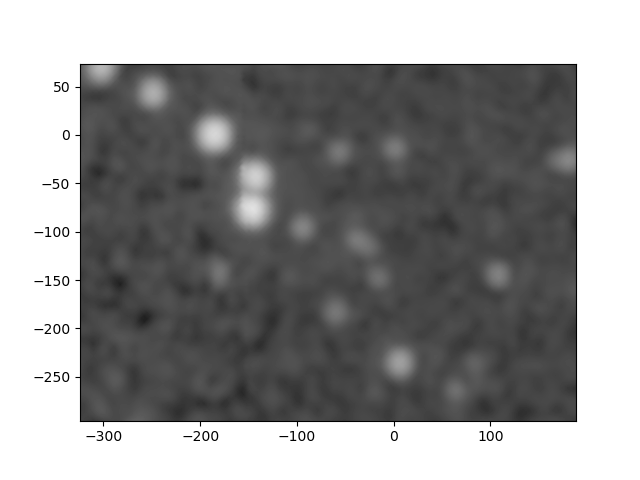

In [128]:
from astroquery.simbad import Simbad                                                            
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.visualization import simple_norm
from astropy import wcs as astropy_wcs
from urllib.parse import urlencode
from astropy.io import fits


coord = SkyCoord(str(np.round(RA_Center,13))+'  '+str(np.round(DEC_Center,13)),unit=(u.deg, u.deg), frame='icrs') 

print(RA_Center,DEC_Center)

IM_CCD_Scale1 = 180./1056 #180/1024 or 180/1056 for full pixels? #~0.18
IM_CCD_Scale2 = 180./1032 #180/1024 or 180/1032 for full pixels? #~0.18


w = astropy_wcs.WCS(header={
    'NAXIS1': 1056,         # Width of the output fits/image
    'NAXIS2': 1032,         # Height of the output fits/image
    'WCSAXES': 2,           # Number of coordinate axes
    'CRPIX1': 528.0,        # Pixel coordinate of reference point
    'CRPIX2': 516.0,        # Pixel coordinate of reference point
    'CDELT1': (IM_CCD_Scale1* u.arcsec).to(u.deg).value,    # [deg] Coordinate increment at reference point
    'CDELT2': (IM_CCD_Scale2* u.arcsec).to(u.deg).value,   # [deg] Coordinate increment at reference point
    'CUNIT1': 'deg',        # Units of coordinate increment and value
    'CUNIT2': 'deg',        # Units of coordinate increment and value
    'CTYPE1': 'RA---TAN',   # Right ascension, gnomonic projection
    'CTYPE2': 'DEC--TAN',   # Declination, gnomonic projection 
    'CRVAL1': RA_Center,          # [deg] Coordinate value at reference point
    'CRVAL2': DEC_Center,          # [deg] Coordinate value at reference point
})
hips = '2MASS/J'#'CDS/P/DSS2/red'
#result = hips2fits.query_with_wcs(
#   hips=hips,
#   wcs=w,
#   get_query_payload=False,
#   format='fits',
#   min_cut=0.5,
#   max_cut=99.5,
#   cmap=Colormap('viridis'),
#)
query_params = { 
             'hips': '2MASS/J',
#             'wcs': w, 
             'ra': RA_Center, 
             'dec': DEC_Center,
             'fov': (3.095 * u.arcmin).to(u.deg).value, 
             'projection': 'TAN',
             'width': 1056, 
             'height': 1032 
             }                                                                                               
url = f'http://alasky.u-strasbg.fr/hips-image-services/hips2fits?{urlencode(query_params)}' 
print(url)
hdul = fits.open(url)
hdul.info()
header = hdul[0].header
image = hdul[0].data
#hdul[0].data = np.fliplr(hdul[0].data)
#to save
filename  = "Strasbourg_"+str(np.round(RA_Center,13))+"_"+str(np.round(DEC_Center,13))+".fits"
hdul.writeto(filename,overwrite=True)
print(filename)
#print(header)
print('scale of DSS image: ',header['CDELT2']*3600.,'\n')

print("to be compared with the default scale of SAMOS")
print('SAMOS scale: ',180/1024.)

%matplotlib notebook
hipsnorm = simple_norm(data=image, stretch='log')
im = plt.imshow(image, origin='lower',cmap='gray',norm=hipsnorm,extent=[-512, 512, -512, 512])
plt.show(im)

In [167]:
(header['cdelt2']*u.deg).to(u.arcsec).value, 180/1024, 185.7/1032, 185.7/1056

(0.1758522846050928, 0.17578125, 0.17994186046511626, 0.17585227272727272)

In [131]:
# Determine the RADEC offset from our center coords in degrees
RA_Offsets = finaltable['ra'] - RA_Center
DEC_Offsets = finaltable['dec'] - DEC_Center
print(np.c_[RA_Offsets, DEC_Offsets]) #in degrees

# Determine the RADEC offset in arcsec
RA_Offsets *= 3600
DEC_Offsets *= 3600
print(np.c_[RA_Offsets, DEC_Offsets])   #in arcsec

[[ 8.01479889e-03 -3.81661994e-03]
 [ 7.83716936e-03 -2.15583301e-03]
 [ 1.02005554e-02  5.98046484e-05]
 [ 7.75789826e-03  6.19796940e-03]
 [ 1.37042792e-02  2.16345218e-03]
 [ 1.66747195e-02  3.47506719e-03]
 [-2.63951987e-03  1.13939529e-02]
 [-1.10207140e-02  8.89852362e-03]
 [-1.99976064e-02 -3.02437818e-03]
 [-1.52699381e-02 -2.33364848e-02]
 [ 1.98648249e-03  1.92034608e-02]
 [-9.74916095e-03  1.76762061e-02]
 [-8.03174463e-03  2.07869317e-02]
 [-7.71525981e-03  2.33364848e-02]]
[[ 28.85327599 -13.73983178]
 [ 28.21380971  -7.76099884]
 [ 36.72199928   0.21529673]
 [ 27.92843372  22.31268983]
 [ 49.33540511   7.78842787]
 [ 60.02899018  12.51024187]
 [ -9.50227154  41.01823062]
 [-39.67457041  32.03468503]
 [-71.991383   -10.88776146]
 [-54.97177703 -84.01134526]
 [  7.15133697  69.13245879]
 [-35.09697941  63.63434206]
 [-28.91428068  74.83295428]
 [-27.77493533  84.01134526]]


In [204]:
#Determine the RADEC position in SAMOS CCD pixels [1024,1024] (these are the pixels in the field of view)

IM_CCD_Scale1 = 180/1024 # 180/1024 or 180/1056 for full pixels? #~0.18
IM_CCD_Scale2 = 180/1024 # 180/1024 or 180/1032 for full pixels? #~0.18

print(IM_CCD_Scale2, "arcsec/pixel")
print((IM_CCD_Scale1 * u.arcsec).to(u.degree), "deg/pixel")
print((IM_CCD_Scale2 * u.arcsec).to(u.degree), "deg/pixel")

#
RA_Offsets_IMpix = -RA_Offsets / IM_CCD_Scale1 # in pixels, negative RA because our X-axis is flipped for some reaason
DEC_Offsets_IMpix = DEC_Offsets / IM_CCD_Scale2

shifted_ra_offset_impix = RA_Offsets_IMpix+528
shifted_dec_offset_impix = DEC_Offsets_IMpix+516
print(np.c_[RA_Offsets_IMpix+528, DEC_Offsets_IMpix+516])   #in pixels

0.17578125 arcsec/pixel
4.8828125e-05 deg deg/pixel
4.8828125e-05 deg deg/pixel
[[363.85691879 437.83562366]
 [367.49477142 471.84853996]
 [319.09262631 517.2247992 ]
 [369.1182437  642.93441328]
 [247.33636204 560.30750074]
 [186.50174475 587.169376  ]
 [582.05736699 749.3481564 ]
 [753.70422279 698.24176375]
 [937.55097885 454.06073483]
 [840.72833153  38.06879139]
 [487.31683858 909.28687665]
 [727.6628162  878.00870149]
 [692.49013011 941.71636212]
 [686.00852098 993.93120861]]


In [205]:
# Here are the sky-to-pixel coordinates calculated by astropy.wcs.utils
# You need a WCS for this, so we are getting this from the header of the
# image we downloaded from Strasbourg

stas_wcs = WCS(header)

impix_coords = np.array([skycoord_to_pixel(i,stas_wcs) for i in SkyCoord(finaltable["ra"], finaltable["dec"], unit=u.deg)])


#these coordinates are not shifted to be from center, so shift them
shifted_impix_ra = impix_coords[:,0]#-528.
shifted_impix_dec = impix_coords[:,1]#-516



np.c_[shifted_impix_ra, shifted_impix_dec]


array([[377.51900584, 436.87150837],
       [380.83382494, 470.87049667],
       [336.75911101, 516.23128782],
       [382.32180992, 641.88717934],
       [271.41872483, 559.30220842],
       [216.02399914, 586.15929054],
       [576.22277489, 748.25436747],
       [732.52253852, 697.17630331],
       [899.96549706, 453.11259173],
       [811.83778218,  37.27746074],
       [489.95760143, 908.1282902 ],
       [708.79705465, 876.86886389],
       [676.76792709, 940.54874715],
       [670.86353693, 992.7421751 ]])

In [210]:
# want to get average differences between the WCS converted pixels and  the scale factor converted pixels

diff_xpix = shifted_ra_offset_impix-shifted_impix_ra
diff_ypix = shifted_dec_offset_impix-shifted_impix_dec

avg_diff_xpix = np.ones_like(shifted_impix_ra)*np.mean(diff_xpix)
avg_diff_ypix = np.ones_like(shifted_impix_ra)*np.mean(diff_ypix)

xdiff_offset_from_avg = avg_diff_xpix-diff_xpix
ydiff_offset_from_avg = avg_diff_ypix-diff_ypix



dfcols = ["scaled_xpix", "scaled_ypix", "wcs_xpix", "wcs_ypix", "dx", "dy",
          "avg_dx", "avg_dy"]



dfdata = np.asarray([shifted_ra_offset_impix, shifted_dec_offset_impix, 
                                          shifted_impix_ra, shifted_impix_dec,
                                         diff_xpix, diff_ypix, avg_diff_xpix, avg_diff_ypix])

pixels_df = pd.DataFrame(data=dfdata.T,columns=dfcols)

pixels_df["wcspx_plus_dxav"] = pixels_df.wcs_xpix+avg_diff_xpix
pixels_df["wcspy_plus_dyav"] = pixels_df.wcs_ypix+avg_diff_ypix

pixels_df["new_dx_noav"] = pixels_df.wcspx_plus_dxav-pixels_df.scaled_xpix
pixels_df["new_dy_noav"] = pixels_df.wcspy_plus_dyav-pixels_df.scaled_ypix

pixels_df

,scaled_xpix,scaled_ypix,wcs_xpix,wcs_ypix,dx,dy,avg_dx,avg_dy,wcspx_plus_dxav,wcspy_plus_dyav,new_dx_noav,new_dy_noav
0,363.856919,437.835624,377.519006,436.871508,-13.662087,0.964115,2.079192,1.039434,379.598198,437.910942,15.741279,0.075319
1,367.494771,471.848540,380.833825,470.870497,-13.339054,0.978043,2.079192,1.039434,382.913017,471.909931,15.418245,0.061391
2,319.092626,517.224799,336.759111,516.231288,-17.666485,0.993511,2.079192,1.039434,338.838303,517.270722,19.745676,0.045923
3,369.118244,642.934413,382.321810,641.887179,-13.203566,1.047234,2.079192,1.039434,384.401002,642.926613,15.282758,-0.007800
4,247.336362,560.307501,271.418725,559.302208,-24.082363,1.005292,2.079192,1.039434,273.497917,560.341643,26.161555,0.034142
5,186.501745,587.169376,216.023999,586.159291,-29.522254,1.010085,2.079192,1.039434,218.103191,587.198725,31.601446,0.029349
6,582.057367,749.348156,576.222775,748.254367,5.834592,1.093789,2.079192,1.039434,578.301967,749.293802,-3.755400,-0.054355
7,753.704223,698.241764,732.522539,697.176303,21.181684,1.065460,2.079192,1.039434,734.601730,698.215737,-19.102493,-0.026026
8,937.550979,454.060735,899.965497,453.112592,37.585482,0.948143,2.079192,1.039434,902.044689,454.152026,-35.506290,0.091291
9,840.728332,38.068791,811.837782,37.277461,28.890549,0.791331,2.079192,1.039434,813.916974,38.316895,-26.811358,0.248103


<IPython.core.display.Javascript object>


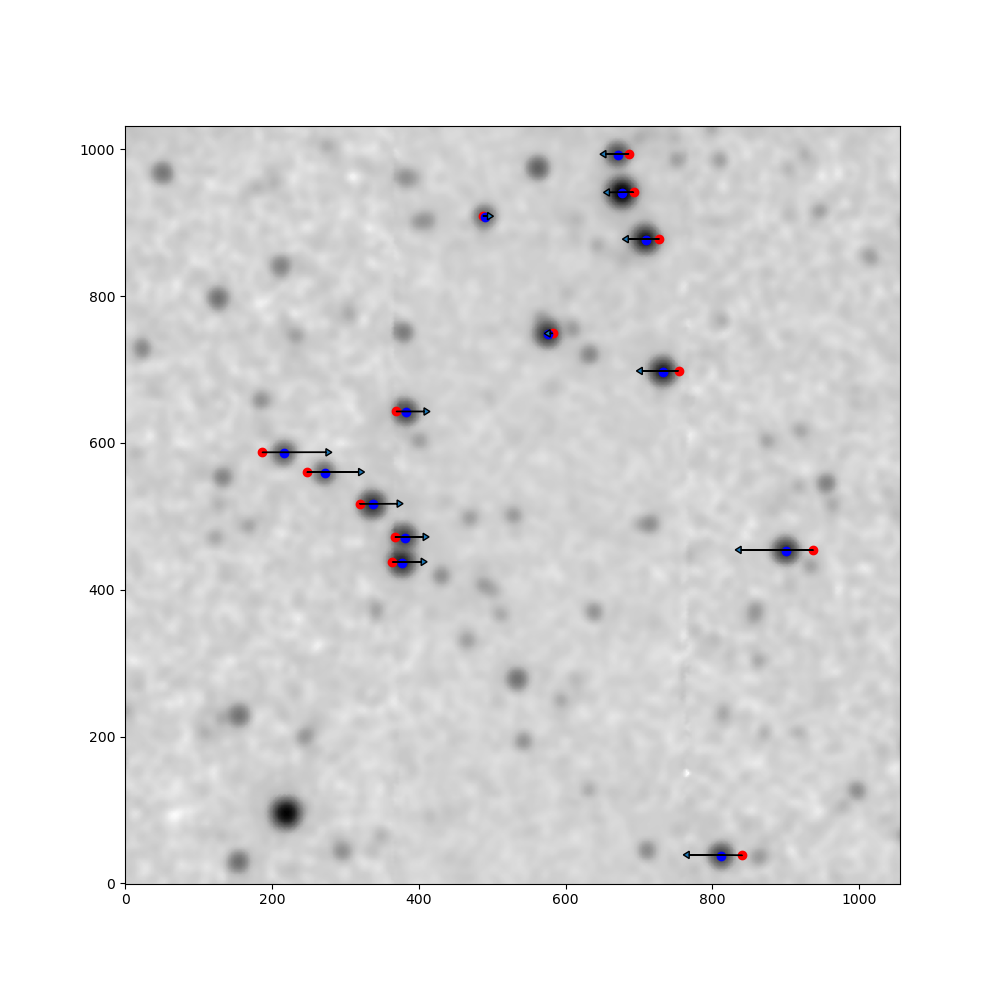

In [226]:

fig_arr = plt.figure(figsize=(10,10))
ax_arr = fig_arr.add_subplot(111)


norm = simple_norm(data=image,stretch='log')
im4 = ax_arr.imshow(image, cmap='Greys', origin='lower', norm=norm,
           interpolation='nearest')

ax_arr.plot(pixels_df.scaled_xpix, pixels_df.scaled_ypix, 'ro',zorder=0)

ax_arr.plot(pixels_df.wcs_xpix, pixels_df.wcs_ypix, 'bo',zorder=1)

for i in range(len(pixels_df)):
    ax_arr.arrow(pixels_df.loc[i,'scaled_xpix'],pixels_df.loc[i,'scaled_ypix'],
        dx=pixels_df.loc[i,'new_dx_noav']*3,dy=pixels_df.loc[i,'new_dy_noav']*3,
          head_width=10, length_includes_head=True, head_length=8)

<IPython.core.display.Javascript object>


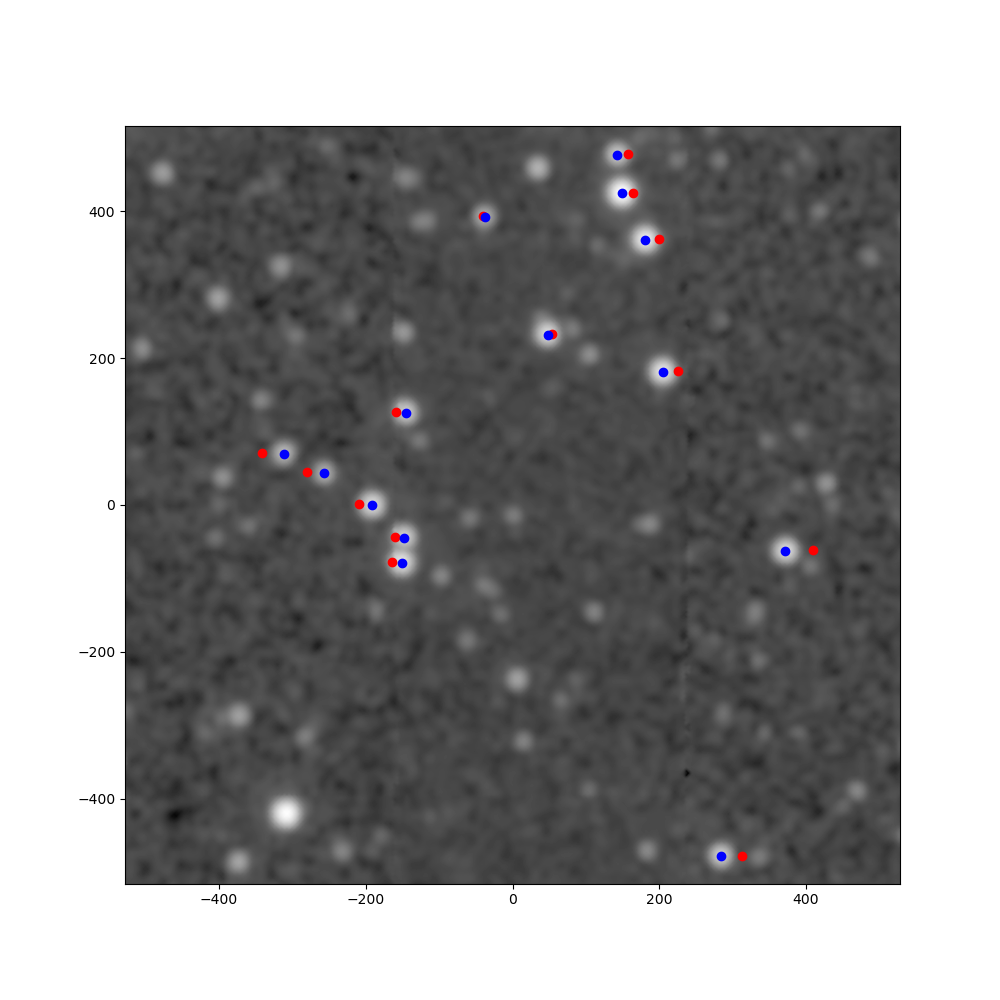

In [179]:
plt.figure(figsize=(10,10))

axis_extent = [-528, 528, -516, 516]

im = plt.imshow(image, origin='lower',cmap='gray',norm=hipsnorm, extent=axis_extent)

plt.plot(RA_Offsets_IMpix, DEC_Offsets_IMpix, 'ro')
plt.plot(impix_coords[:,0]-528, impix_coords[:,1]-516, 'bo')

plt.axis(axis_extent)

plt.show(im)